### Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

### Goals and Objectives
The requisite is:

- To categorise the countries using some socio-economic and health factors that determine the overall development of the country.
- To suggest the countries which the CEO needs to focus on the most.

### PCA and Clustering

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Reading data from csv
df = pd.read_csv(r"C:\Users\Kamal Tamang\Downloads\Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for duplicates
df.duplicated().sum()

0

In [5]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#Percentile check
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [7]:
# Null value check
df.isnull().sum().max()

0

In [8]:
# Set country as index
df.set_index('country', inplace = True)

### PAIRPLOT

<Figure size 1800x1800 with 0 Axes>

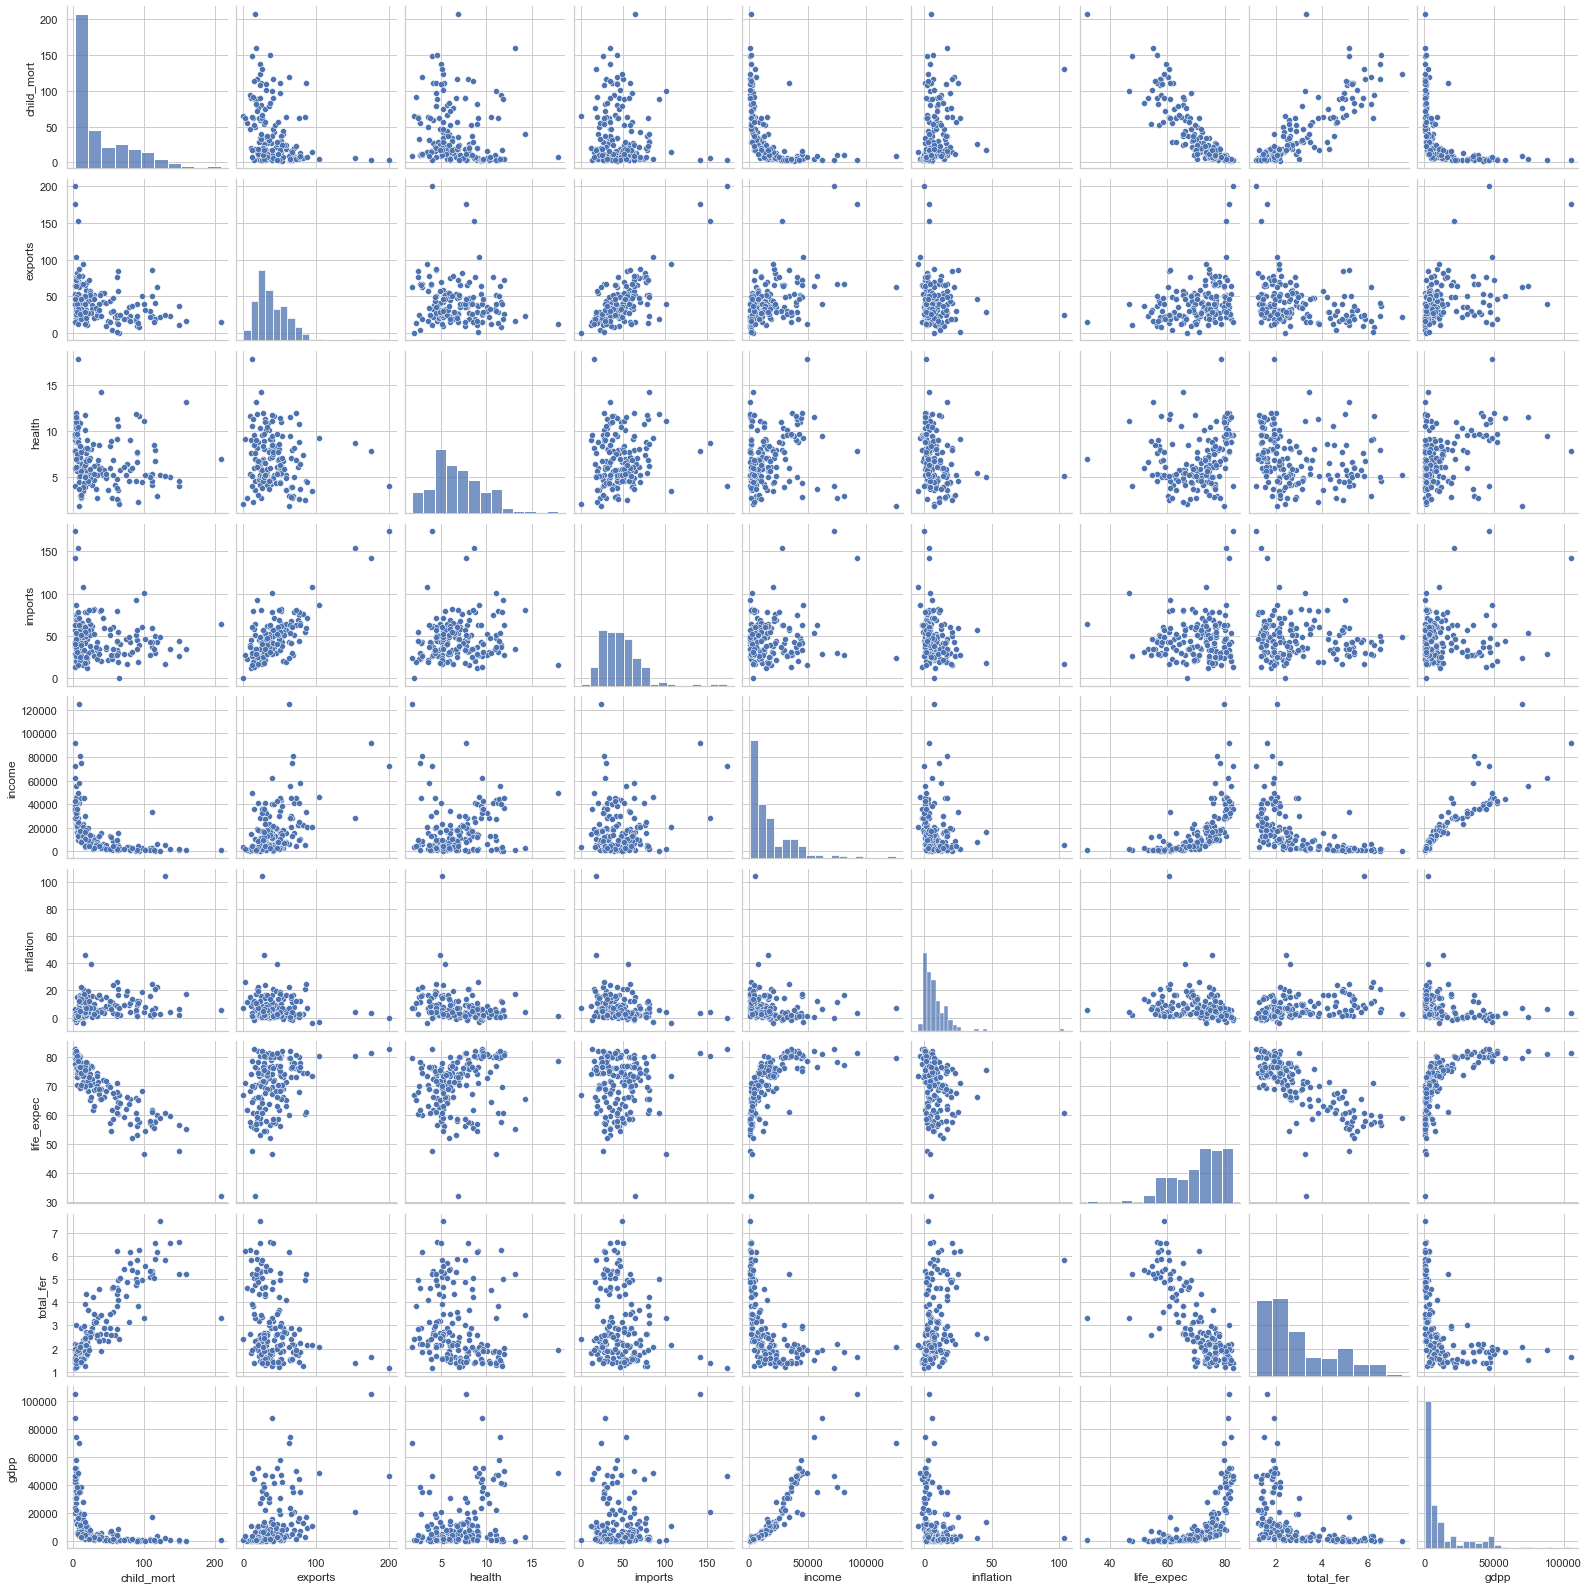

In [9]:
#Data Analysis by plotting multiple bivariate plots using seaborn's pairplot 
plt.figure(figsize = (25,25))
sns.pairplot(df)

### Correlation Heatmap

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

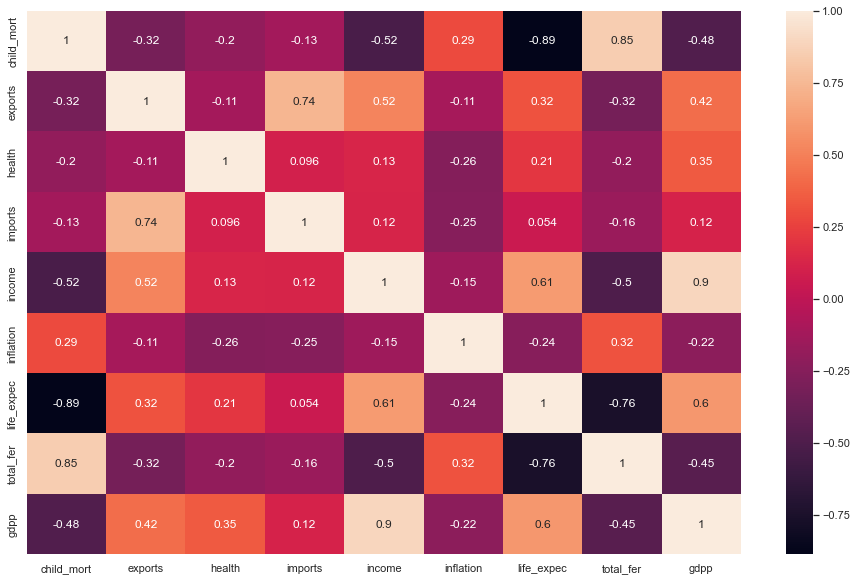

In [10]:
plt.figure(figsize=(16,10))
cor=df.corr()
sns.heatmap(cor, annot =True)
plt.plot
# OPTIONAL cmap ="YlGnBu"

### Taking log for all features except inflation - since that has non-zero values

In [11]:
# Inflation has non-zero values
df_log = np.log(df.drop('inflation', axis =1)) 

In [12]:
df_log = pd.concat([df_log, df['inflation']], axis =1 )

In [13]:
df_log.describe()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3.047884,3.504018,1.835011,3.704301,9.115402,4.247485,0.961887,8.499637,7.781832
std,1.160054,0.769174,0.423748,0.686137,1.228979,0.138750,0.480728,1.500006,10.570704
min,0.955511,-2.216407,0.593327,-2.719617,6.411818,3.468856,0.139762,5.442418,-4.210000
25%,2.109312,3.169686,1.593306,3.407820,8.118197,4.178992,0.585001,7.192821,1.810000
50%,2.960105,3.555348,1.843719,3.768153,9.206332,4.291828,0.879627,8.446771,5.390000
75%,4.128745,3.938664,2.151745,4.073288,10.034506,4.341205,1.355805,9.549611,10.750000
max,5.337538,5.298317,2.884801,5.159055,11.736069,4.416428,2.013569,11.561716,104.000000


<Figure size 1080x1080 with 0 Axes>

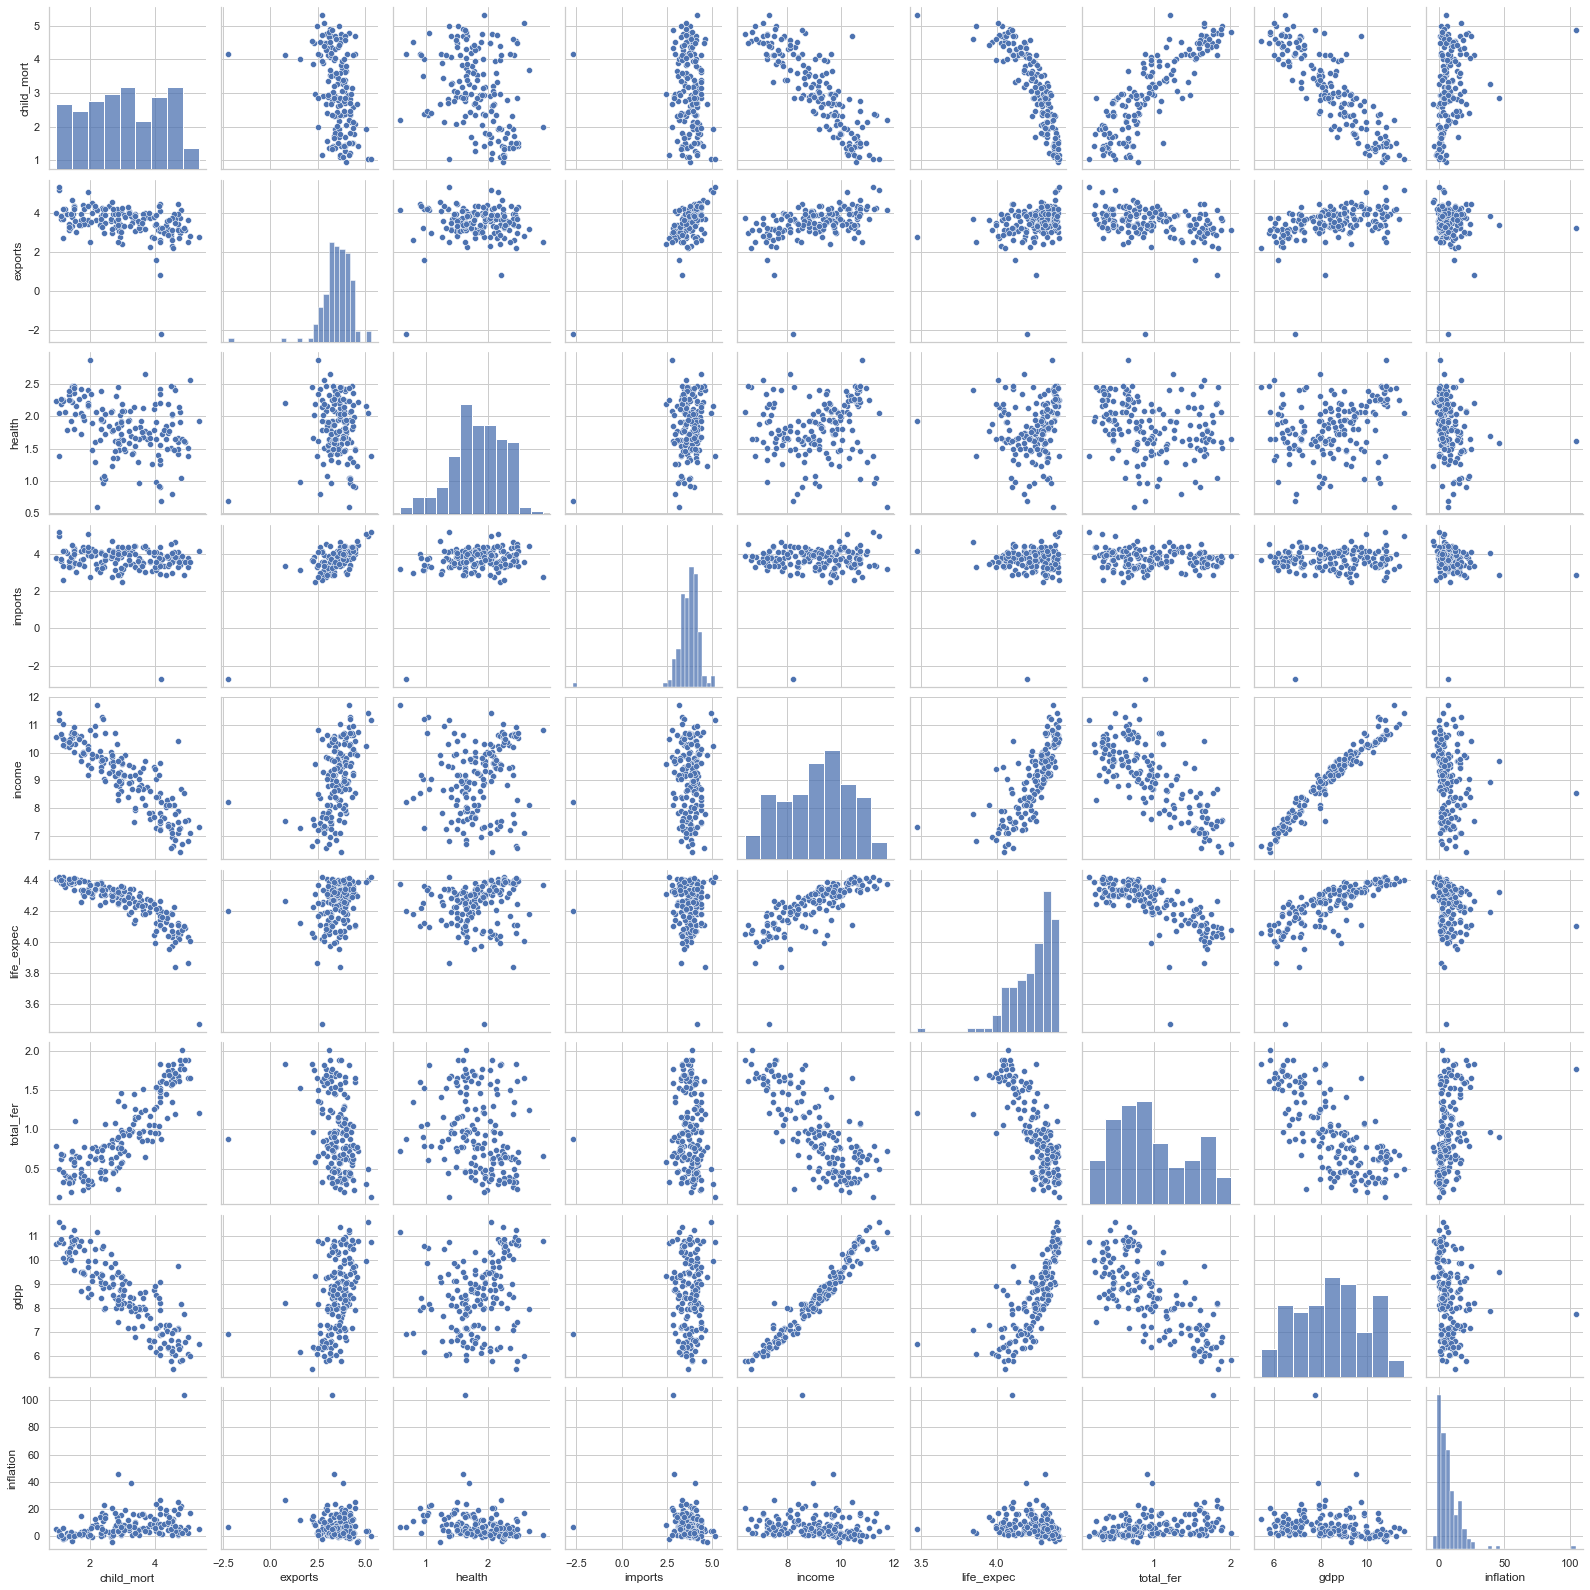

In [14]:
plt.figure(figsize = (15,15))
sns.pairplot(df_log)

### Removing Outliers

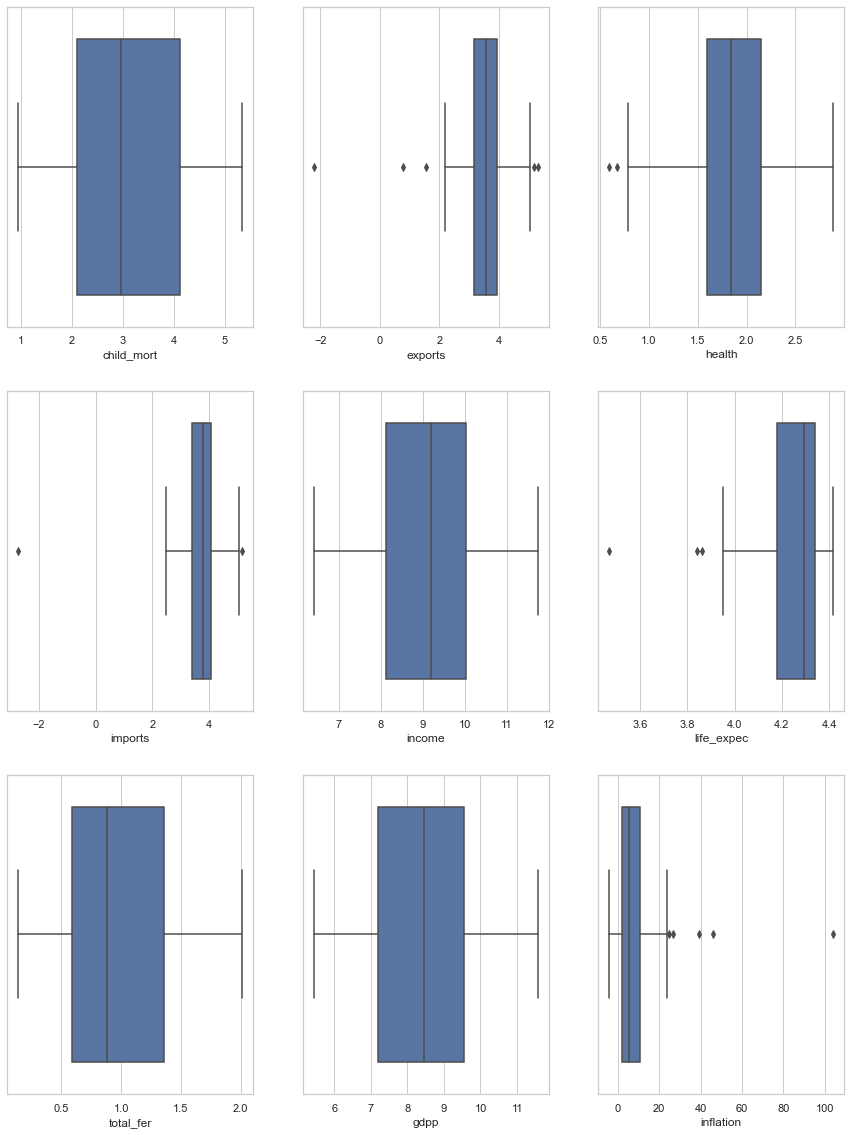

In [15]:
# Trying to determine columns having outliers
plt.figure(figsize=(15, 20))
for i, x_var in enumerate(df_log.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df_log, orient = 'v')

In [16]:
#Creating another dataframe for removing outliers
df_no_outliers = df_log.copy()

### Performing Outlier analysis before PCA (Omitted this part) since it was told to perform outlier ananlysis after PCA in the preassignment session

In [17]:
# # Method for outlier treatment using inter-quartile range technique
# for i, var in enumerate(df_no_outliers.columns):
#     Q1 = df_no_outliers[var].quantile(0.05)
#     Q3 = df_no_outliers[var].quantile(0.95)
#     IQR = Q3 - Q1
#     df_no_outliers = df_no_outliers[(df_no_outliers[var] >= Q1 - 1.5*IQR) & (df_no_outliers[var] <= Q3 + 1.5*IQR)]

In [18]:
# df_no_outliers.describe()
# # OPTIONAL percentiles=[.25,.5,.75,.90,.95,.99]

In [19]:
# plt.figure(figsize=(15,10))
# sns.pairplot(df_no_outliers)

In [20]:
# df_no_outliers.head()

### Data Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns = df_no_outliers.columns, index=df_no_outliers.index)

In [23]:
df_scaled.describe()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-1.515754e-16,2.634287e-16,4.364440e-16,7.977650e-18,5.757204e-16,-1.723173e-15,-2.366703e-16,3.383853e-16,3.988825e-18
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.809110e+00,-7.459472e+00,-2.939059e+00,-9.390595e+00,-2.206478e+00,-5.628619e+00,-1.715309e+00,-2.044268e+00,-1.137852e+00
25%,-8.115091e-01,-4.359711e-01,-5.721137e-01,-4.334014e-01,-8.138497e-01,-4.951252e-01,-7.863465e-01,-8.738276e-01,-5.666409e-01
50%,-7.589583e-02,6.693539e-02,2.061154e-02,9.333909e-02,7.421119e-02,3.205559e-01,-1.716296e-01,-3.535021e-02,-2.269504e-01
75%,9.345347e-01,5.667825e-01,7.497072e-01,5.393911e-01,7.501095e-01,6.774915e-01,8.218855e-01,7.020849e-01,2.816364e-01
max,1.979683e+00,2.339779e+00,2.484844e+00,2.126585e+00,2.138808e+00,1.221273e+00,2.194266e+00,2.047517e+00,9.129718e+00


In [24]:
df_scaled.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
country,,,,,,,,,
Afghanistan,1.257285,-1.566676,0.450917,0.146381,-1.413059,-1.580003,1.667924,-1.460560,0.157336
Albania,-0.206196,-0.224045,0.105222,0.262136,0.071749,0.630275,-0.962078,-0.122592,-0.312347
Algeria,0.223939,0.187829,-0.963592,-0.376408,0.285304,0.649198,0.207329,-0.064683,0.789274
Angola,1.496866,0.818843,-1.864462,0.079772,-0.353135,-1.094994,1.786385,-0.221051,1.387054
Antigua and Barbuda,-0.618844,0.409060,-0.090571,0.543123,0.605603,0.677491,-0.429314,0.608191,-0.601749


### Performing PCA (dimensionality reduction)

In [25]:
#Importing the PCA module from sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
pca.fit(df_scaled)

PCA(random_state=42, svd_solver='randomized')

### Performing outlier analysis after PCA

In [27]:
# Method for outlier treatment using inter-quartile range technique
for i, var in enumerate(df_scaled.columns):
    Q1 = df_scaled[var].quantile(0.05)
    Q3 = df_scaled[var].quantile(0.95)
    IQR = Q3 - Q1
    df_scaled = df_scaled[(df_scaled[var] >= Q1 - 1.5*IQR) & (df_scaled[var] <= Q3 + 1.5*IQR)]

In [28]:
df_scaled.describe()
# OPTIONAL percentiles=[.25,.5,.75,.90,.95,.99]

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,-0.015390,0.047368,0.019634,0.064424,0.007234,0.008351,-0.009112,0.009523,-0.054905
std,0.998635,0.822174,0.985213,0.683409,1.006817,1.005420,1.000460,1.004823,0.712030
min,-1.809110,-3.541109,-2.939059,-1.807101,-2.206478,-5.628619,-1.715309,-2.044268,-1.137852
25%,-0.848212,-0.435971,-0.567303,-0.409365,-0.817499,-0.495125,-0.792158,-0.863772,-0.570436
50%,-0.080387,0.081754,0.024354,0.093339,0.109491,0.330438,-0.197765,-0.032487,-0.250672
75%,0.887324,0.568052,0.763469,0.543123,0.753689,0.677491,0.805753,0.728274,0.267404
max,1.979683,2.339779,2.484844,2.126585,2.138808,1.221273,2.194266,2.047517,3.616865


<Figure size 1080x720 with 0 Axes>

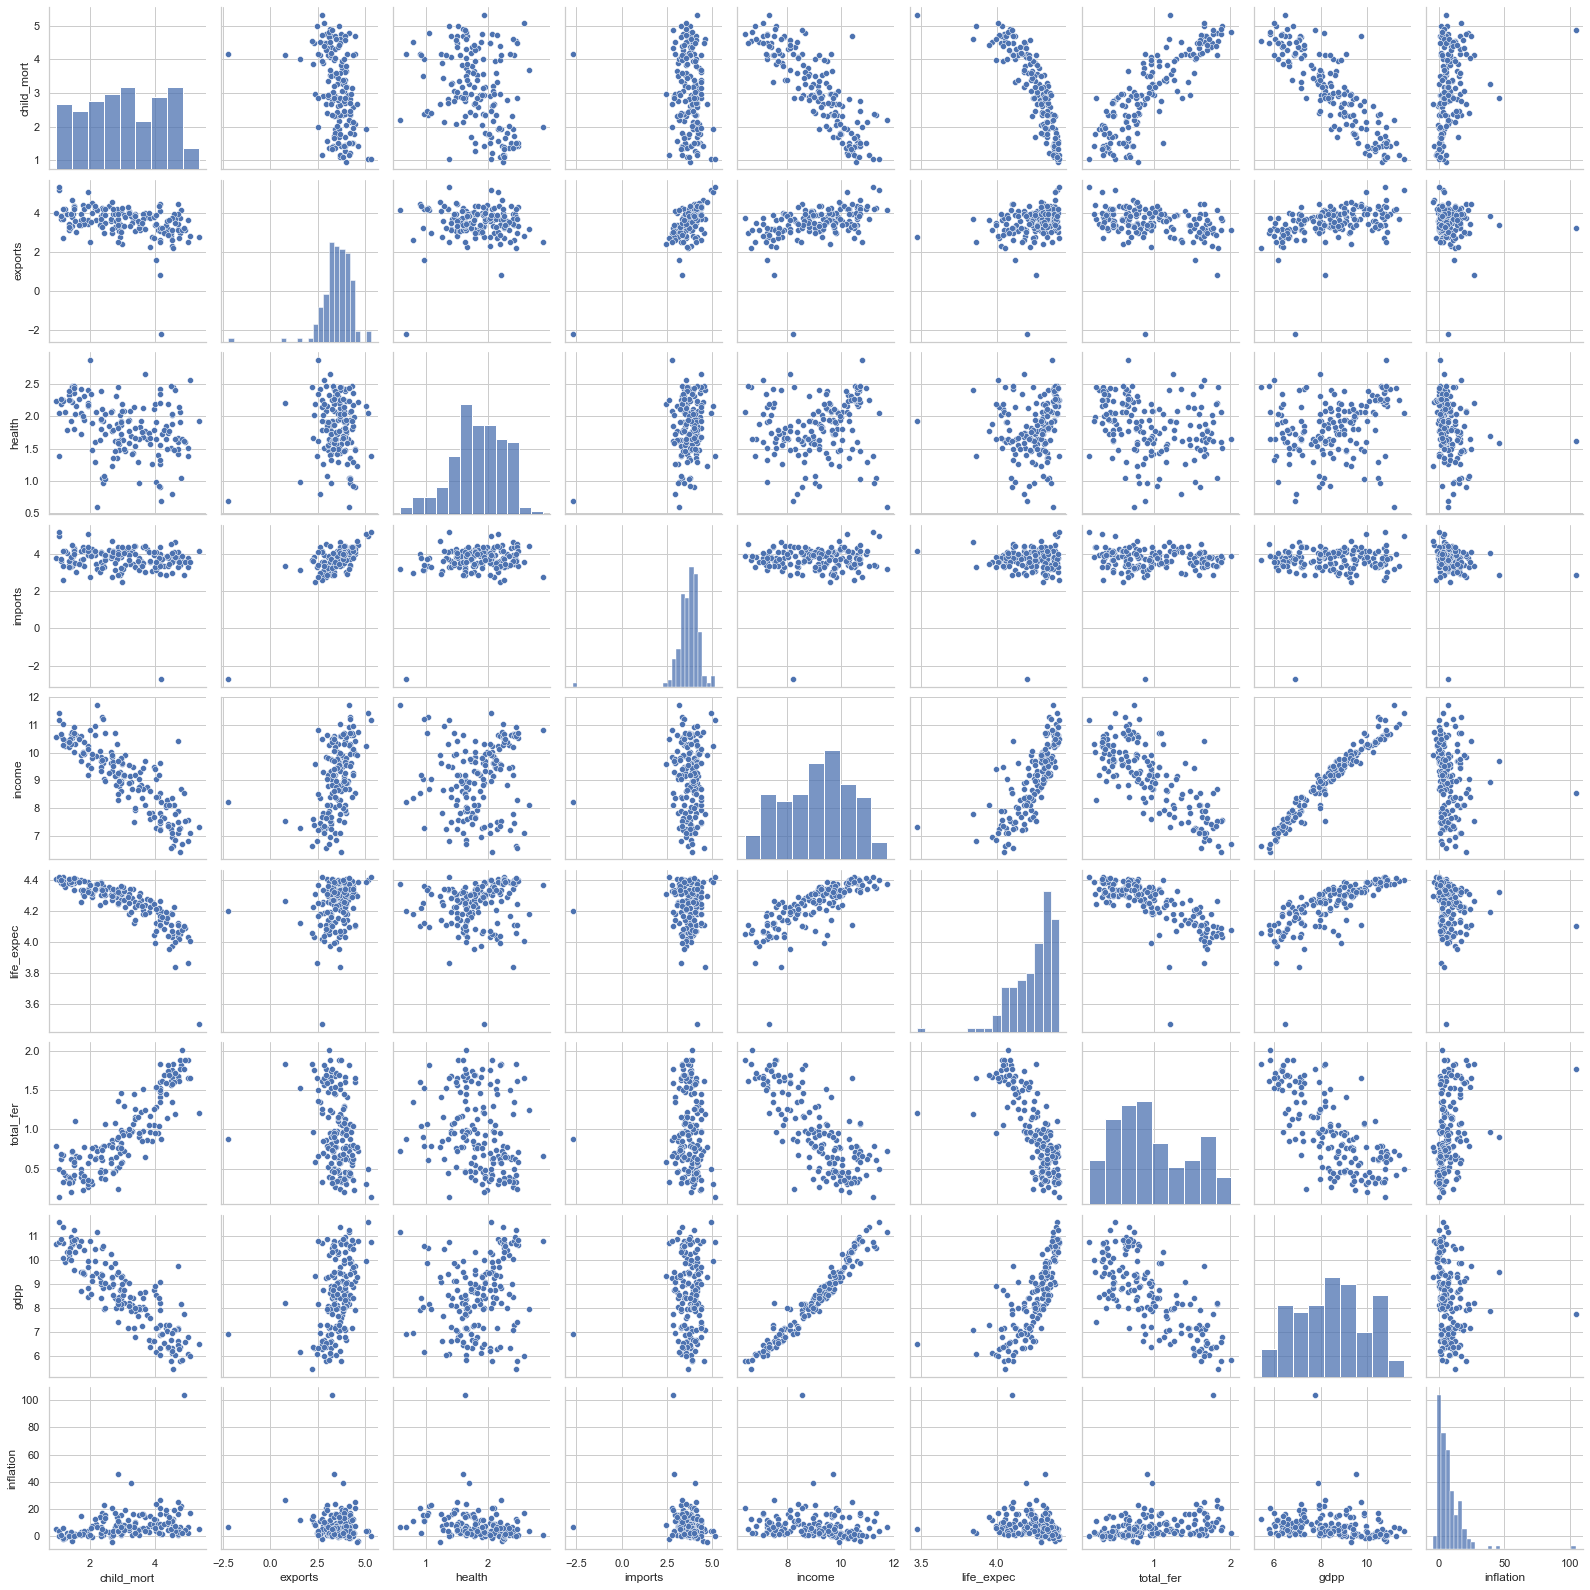

In [29]:
plt.figure(figsize=(15,10))
sns.pairplot(df_no_outliers)

In [30]:
df_no_outliers.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation
country,,,,,,,,,
Afghanistan,4.502029,2.302585,2.025513,3.804438,7.383989,4.028917,1.761300,6.315358,9.44
Albania,2.809403,3.332205,1.879465,3.883624,9.203316,4.334673,0.500775,8.316300,4.49
Algeria,3.306887,3.648057,1.427916,3.446808,9.464983,4.337291,1.061257,8.402904,16.10
Angola,4.779123,4.131961,1.047319,3.758872,8.682708,4.096010,1.818077,8.169053,22.40
Antigua and Barbuda,2.332144,3.817712,1.796747,4.075841,9.857444,4.341205,0.756122,9.409191,1.44


### Making Screenplot

Text(0, 0.5, 'cumulative explained variance')

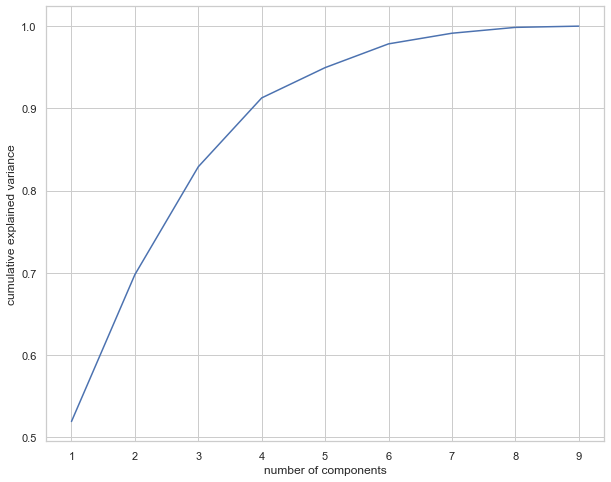

In [31]:
#Making the screeplot
plt.figure(figsize = (10,8))
sns.lineplot(y = np.cumsum(pca.explained_variance_ratio_), x = range(1,len(df_scaled.columns)+1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [32]:
#pca_again
pca_again = PCA(0.94)

In [33]:
df_pca = pca_again.fit_transform(df_scaled)
df_pca.shape

(165, 5)

In [34]:
# # Method for outlier treatment using inter-quartile range technique
# for i, var in enumerate(df_no_outliers.columns):
#     Q1 = df_no_outliers[var].quantile(0.05)
#     Q3 = df_no_outliers[var].quantile(0.95)
#     IQR = Q3 - Q1
#     df_no_outliers = df_no_outliers[(df_no_outliers[var] >= Q1 - 1.5*IQR) & (df_no_outliers[var] <= Q3 + 1.5*IQR)]

### Choosing the number of principal components = 5

In [35]:
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = df_scaled.index)

In [36]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,3.476443,-1.128593,0.257449,0.115478,-0.166041
Albania,-0.698410,-0.272577,0.056779,-0.712693,0.526373
Algeria,0.054288,1.240218,0.746989,0.147524,0.440362
Angola,2.388262,2.390629,-0.141997,1.183710,-0.300872
Antigua and Barbuda,-1.382952,0.181993,-0.413229,-0.343896,-0.130976


### Visualizing the principal components

In [37]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':list(df_scaled.columns)})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.444310,-0.079367,child_mort
1,-0.240511,-0.561360,exports
2,-0.144080,-0.156260,health
3,-0.103216,-0.742524,imports
4,-0.427584,0.132699,income
5,-0.394286,0.188802,life_expec
6,0.404796,-0.110566,total_fer
7,-0.429402,0.113183,gdpp
8,0.163693,0.156606,inflation


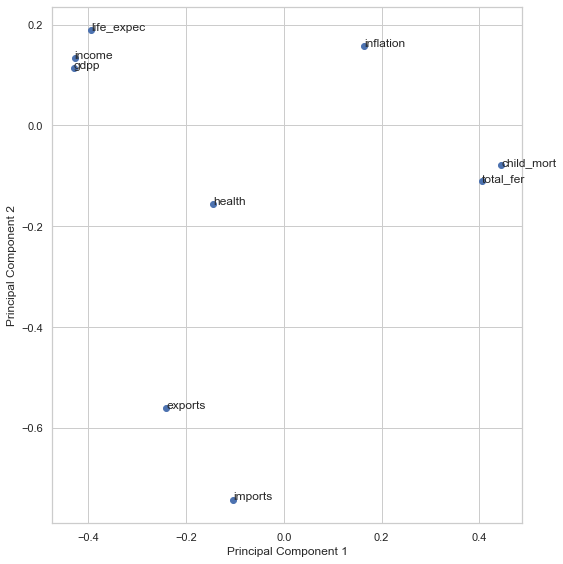

In [38]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

### Step 4: Perform clustering

### Check Hopkins Statistics (Clustering potential)
### Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.
- If the value is around 0.5, it is random.
- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [40]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [41]:
print("DF_PCA: ", hopkins(df_pca))
print("DF_scaled: ", hopkins(df_scaled))

DF_PCA:  0.6841846826361749
DF_scaled:  0.8013886832588535


### Select optimum number of clusters

In [42]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Silhouette score')

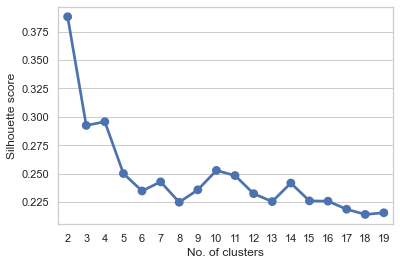

In [43]:
from sklearn.metrics import silhouette_score
sse = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init = 50).fit(df_pca)
    sse.append([k, silhouette_score(df_pca, kmeans.labels_)])
sns.pointplot(pd.DataFrame(sse)[0], y = pd.DataFrame(sse)[1])
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette score')

Text(0, 0.5, 'Sum of squared errors')

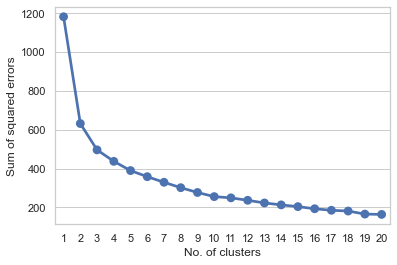

In [44]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append([num_clusters, model_clus.inertia_])

sns.pointplot(x = pd.DataFrame(ssd)[0], y = pd.DataFrame(ssd)[1])
plt.xlabel('No. of clusters')
plt.ylabel('Sum of squared errors')

### Optimum number of clusters through hierarchical clustering

In [45]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

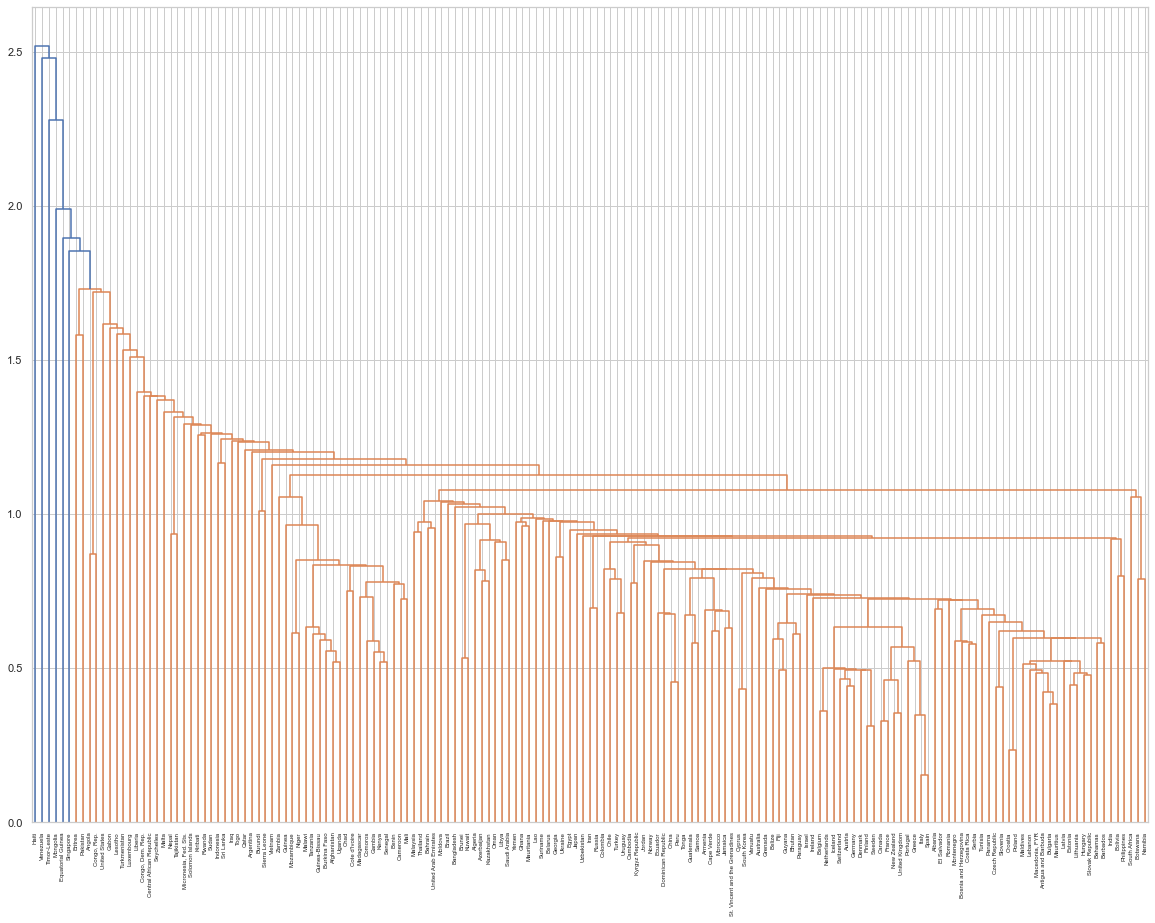

In [46]:
plt.figure(figsize=(20,15))
mergings_s = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings_s, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

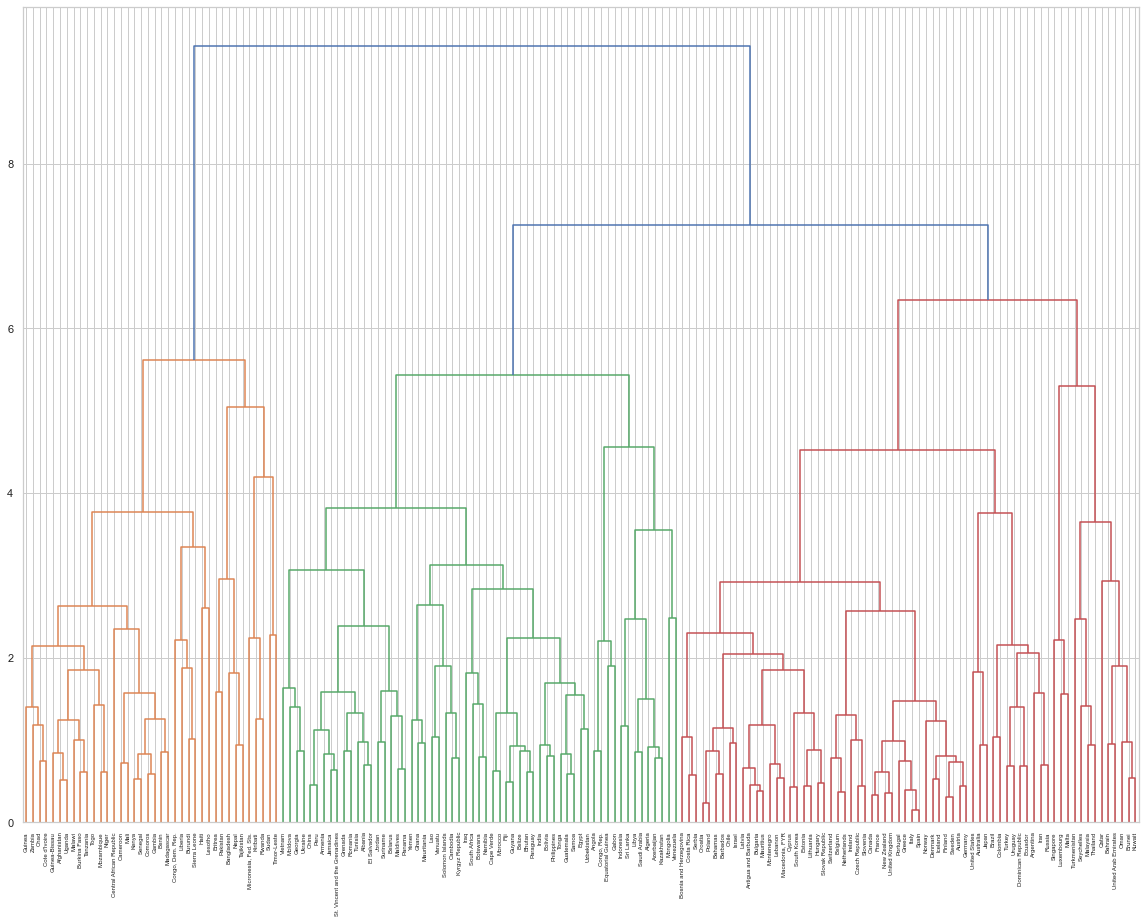

In [47]:
plt.figure(figsize=(20,15))
mergings_c = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings_c, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

### Optional to take average

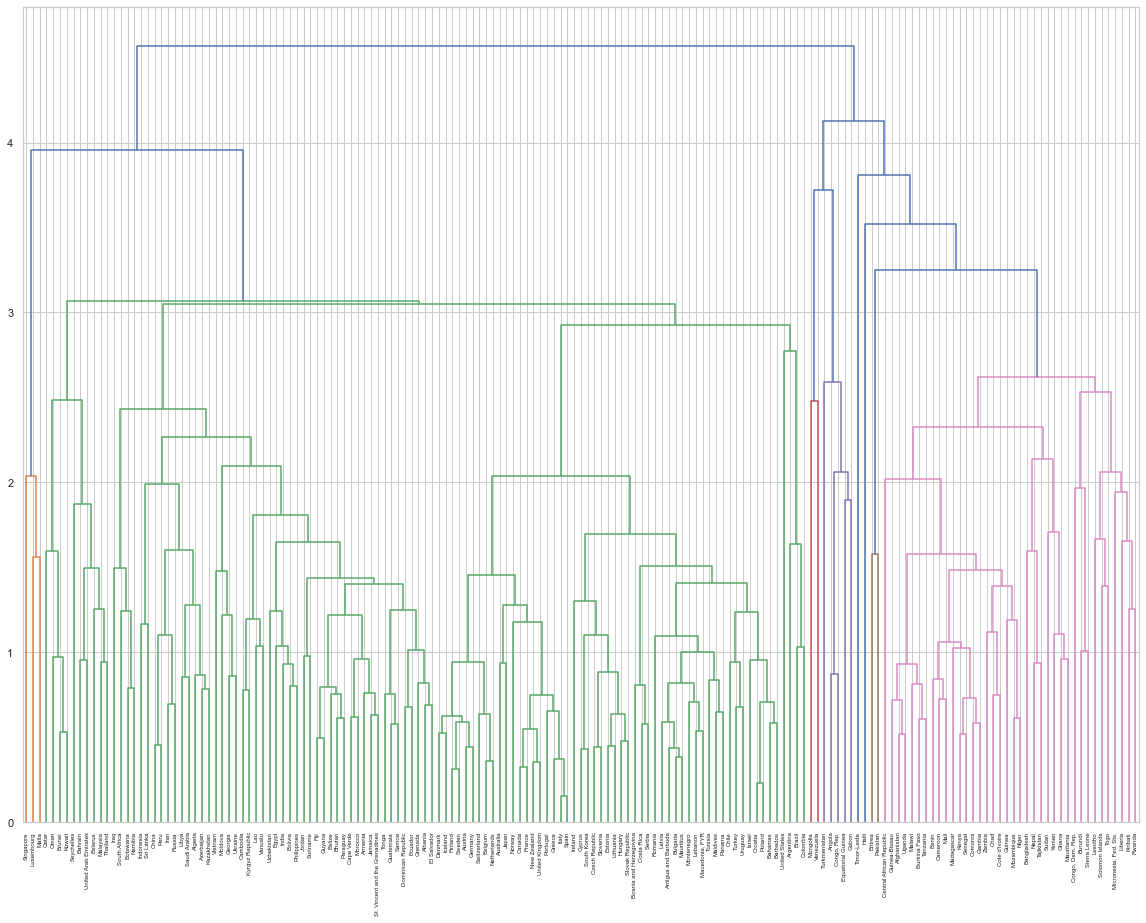

In [48]:
plt.figure(figsize=(20,15))
mergings_a = linkage(df_pca, method = "average", metric='euclidean')
dendrogram(mergings_a, labels=df_pca.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

### We can take the number of clusters to be either 3 or 4
### Perform clustering with # of clusters = 4

In [49]:
# Kmeans with K=4
K_means_4 = KMeans(n_clusters = 4, max_iter=50)
K_means_4.fit(df_pca)

KMeans(max_iter=50, n_clusters=4)

### Step 5) Analysis of clusters formed

### Cluster analysis for # of clusters = 4

In [50]:
# Combining original data, principal components, K-means cluster IDs & Hierarchical clustering cluster IDs
df_2 = df_pca.merge(df, on = 'country')
df_2.head()

,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,,,,,
Afghanistan,3.476443,-1.128593,0.257449,0.115478,-0.166041,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,-0.698410,-0.272577,0.056779,-0.712693,0.526373,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,0.054288,1.240218,0.746989,0.147524,0.440362,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,2.388262,2.390629,-0.141997,1.183710,-0.300872,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,-1.382952,0.181993,-0.413229,-0.343896,-0.130976,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [51]:
K_cluster_labels_4 = pd.Series(K_means_4.labels_, index = df_pca.index) # Merging data with K-mean clusterID data

In [52]:
df_3 = pd.concat([df_2, K_cluster_labels_4], axis = 1)
df_3.columns

Index([       'PC1',        'PC2',        'PC3',        'PC4',        'PC5',
       'child_mort',    'exports',     'health',    'imports',     'income',
        'inflation', 'life_expec',  'total_fer',       'gdpp',            0],
      dtype='object')

In [53]:
df_3 = df_3.rename(columns={0: 'K_clust_4'})
df_3.head()

,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clust_4
country,,,,,,,,,,,,,,,
Afghanistan,3.476443,-1.128593,0.257449,0.115478,-0.166041,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,-0.698410,-0.272577,0.056779,-0.712693,0.526373,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,0.054288,1.240218,0.746989,0.147524,0.440362,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
Angola,2.388262,2.390629,-0.141997,1.183710,-0.300872,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,-1.382952,0.181993,-0.413229,-0.343896,-0.130976,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [54]:
# Merging data with hierarchical clusterID data
# Cutting hierarchical dendogram with 4 clusters 
H_cluster_labels_4 = pd.Series(cut_tree(mergings_c, n_clusters = 4).reshape(-1,), index = df_pca.index)

In [55]:
df_f = pd.concat([df_3, H_cluster_labels_4], axis =1)
df_f = df_f.rename(columns={0: 'H_clust_4'})

In [56]:
df_f.head()

,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_clust_4,H_clust_4
country,,,,,,,,,,,,,,,,
Afghanistan,3.476443,-1.128593,0.257449,0.115478,-0.166041,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
Albania,-0.698410,-0.272577,0.056779,-0.712693,0.526373,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,1
Algeria,0.054288,1.240218,0.746989,0.147524,0.440362,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,1
Angola,2.388262,2.390629,-0.141997,1.183710,-0.300872,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
Antigua and Barbuda,-1.382952,0.181993,-0.413229,-0.343896,-0.130976,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


In [57]:
df_f.K_clust_4.value_counts()

0    49
2    48
1    42
3    26
Name: K_clust_4, dtype: int64

In [58]:
df_f.H_clust_4.value_counts()

1    59
2    55
0    38
3    13
Name: H_clust_4, dtype: int64

In [59]:
ct = pd.crosstab(df_f['H_clust_4'], df_f['K_clust_4'])
print(ct)

K_clust_4   0   1   2   3
H_clust_4                
0           2  36   0   0
1          40   6   0  13
2           7   0  45   3
3           0   0   3  10


### Effectively, K-means clustering has broken down the cluster '1' of Hierarchical clustering - into 2 sub-clusters
We will use the clusters formed by K-means for further analysis

### Analysis of cluster data

In [60]:
df_f.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'child_mort', 'exports', 'health',
       'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp',
       'K_clust_4', 'H_clust_4'],
      dtype='object')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

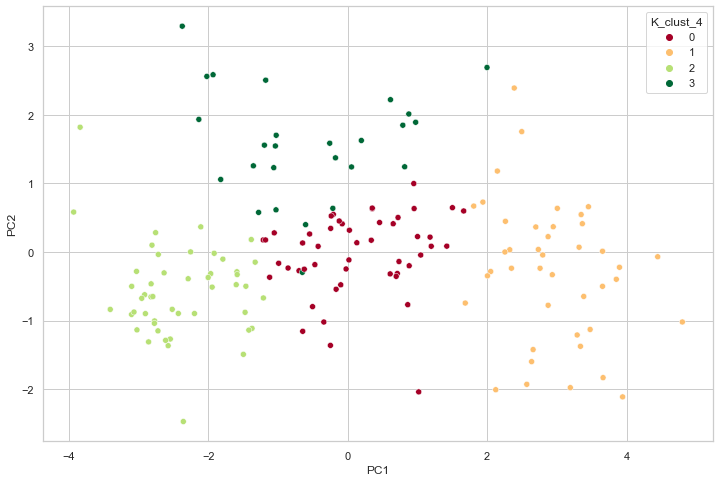

In [61]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'K_clust_4', data = df_f, palette = 'RdYlGn')

In [62]:
cluster_summary = df_f.groupby('K_clust_4').agg({'child_mort': 'mean', 'exports': 'mean', 'health': 'mean',
                               'imports': 'mean', 'income': 'mean', 'inflation': 'mean', 
                             'life_expec': 'mean', 'total_fer': 'mean', 'gdpp': ['mean', 'count']}).round(0)
cluster_summary

child_mort exports health imports   income inflation life_expec  \
                mean    mean   mean    mean     mean      mean       mean   
K_clust_4                                                                   
0               27.0    37.0    6.0    49.0   8542.0       6.0       71.0   
1               94.0    25.0    6.0    44.0   2030.0       9.0       60.0   
2                6.0    53.0    9.0    53.0  32621.0       2.0       79.0   
3               25.0    56.0    4.0    41.0  30178.0      16.0       72.0   

          total_fer     gdpp        
               mean     mean count  
K_clust_4                           
0               3.0   4302.0    49  
1               5.0    922.0    42  
2               2.0  31848.0    48  
3               3.0  14749.0    26

### Relative importance of segment attributes

In [63]:
population_avg = df_f.drop(['K_clust_4', 'H_clust_4'], axis = 1).mean()

In [64]:
cluster_avg_4 = df_f.drop('H_clust_4', axis =1).groupby('K_clust_4').mean()

In [65]:
relative_imp_4 = cluster_avg_4/ population_avg - 1

In [66]:
relative_imp_4

,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
K_clust_4,,,,,,,,,,,,,,
0,2.323223e+15,8.863432e+14,4.390748e+16,-6.952278e+15,1.125468e+17,-0.274657,-0.101373,-0.059585,0.030952,-0.506193,-0.158108,0.006405,-0.128842,-0.671655
1,4.961519e+16,9.963401e+15,1.766488e+16,1.018067e+15,-6.420763e+16,1.490900,-0.408060,-0.055001,-0.073820,-0.882633,0.314580,-0.157525,0.720809,-0.929610
2,-4.050306e+16,2.034171e+16,4.337560e+16,4.015614e+14,-8.770231e+16,-0.845452,0.270205,0.328226,0.109933,0.885758,-0.764283,0.118209,-0.424432,1.430918
3,-9.751117e+15,-5.531906e+16,-1.913623e+17,1.071646e+16,5.352453e+16,-0.329919,0.351383,-0.404813,-0.142036,0.744524,1.200788,0.024162,-0.138000,0.125793


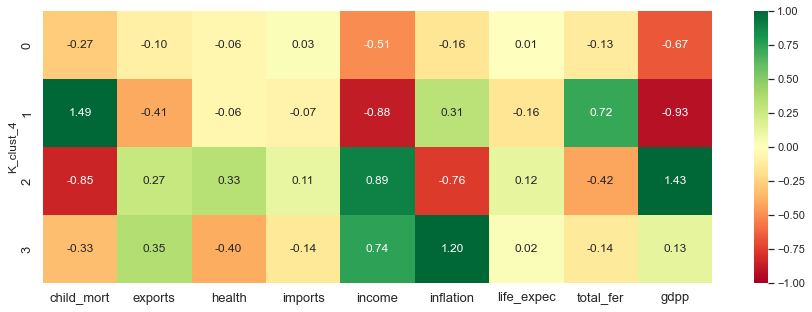

In [67]:
plt.figure(figsize = (15,5))
PCs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax = sns.heatmap(relative_imp_4.drop(PCs, axis = 1), annot = True, fmt = '.2f', vmax = 1, vmin = -1, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)

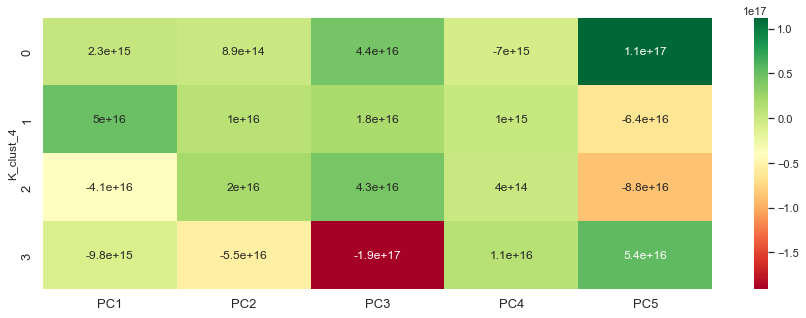

In [68]:
plt.figure(figsize = (15,5))
PCs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax = sns.heatmap(relative_imp_4[PCs], annot = True, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)

### Line Plot analysis

In [69]:
df_sp = df_scaled.copy()
df_sp['K_clust_4'] = K_cluster_labels_4

In [70]:
df_sp.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp,inflation,K_clust_4
country,,,,,,,,,,
Afghanistan,1.257285,-1.566676,0.450917,0.146381,-1.413059,-1.580003,1.667924,-1.460560,0.157336,1
Albania,-0.206196,-0.224045,0.105222,0.262136,0.071749,0.630275,-0.962078,-0.122592,-0.312347,0
Algeria,0.223939,0.187829,-0.963592,-0.376408,0.285304,0.649198,0.207329,-0.064683,0.789274,3
Angola,1.496866,0.818843,-1.864462,0.079772,-0.353135,-1.094994,1.786385,-0.221051,1.387054,1
Antigua and Barbuda,-0.618844,0.409060,-0.090571,0.543123,0.605603,0.677491,-0.429314,0.608191,-0.601749,2


In [71]:
df_melt = pd.melt(df_sp.reset_index(), id_vars = ['country','K_clust_4'], var_name = 'Feature', value_name = 'Value')

In [72]:
df_melt.head()

,country,K_clust_4,Feature,Value
0,Afghanistan,1,child_mort,1.257285
1,Albania,0,child_mort,-0.206196
2,Algeria,3,child_mort,0.223939
3,Angola,1,child_mort,1.496866
4,Antigua and Barbuda,2,child_mort,-0.618844


<AxesSubplot:xlabel='Feature', ylabel='Value'>

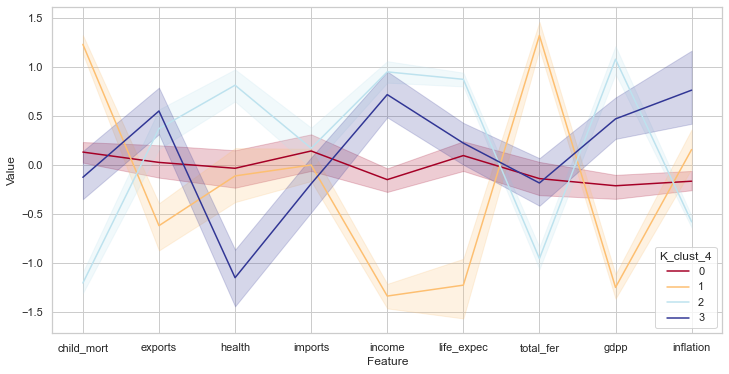

In [73]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt, hue = 'K_clust_4', palette = "RdYlBu")

### Observation: Cluster #1 contains countries that are in direct need of financial aid, since:
- It has disproportionately high child mortality rate, total_fer & inflation.
- It has lowest gdpp, income & life_expectancy.
### Barplots for features

<AxesSubplot:xlabel='K_clust_4', ylabel='mean'>

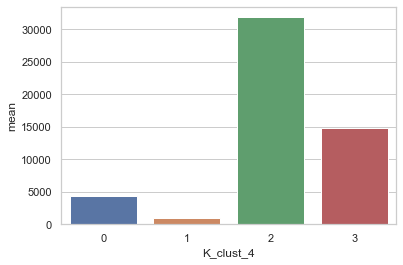

In [74]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['gdpp']['mean'])

<AxesSubplot:xlabel='K_clust_4', ylabel='mean'>

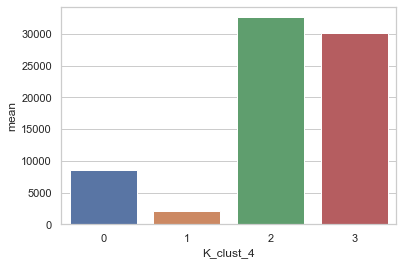

In [75]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['income']['mean'])

<AxesSubplot:xlabel='K_clust_4', ylabel='mean'>

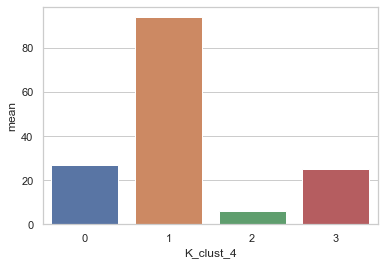

In [76]:
sns.barplot(x = cluster_summary.reset_index().K_clust_4, y = cluster_summary['child_mort']['mean'])

### Barplots for Principal components

In [77]:
cluster_summary_PC = df_f.groupby('K_clust_4').agg({'PC1': 'mean', 'PC2': 'mean', 'PC3': 'mean',
                               'PC4': 'mean', 'PC5': ['mean', 'count']}).round(2)
cluster_summary_PC

PC1   PC2   PC3   PC4   PC5      
           mean  mean  mean  mean  mean count
K_clust_4                                    
0          0.14 -0.03 -0.10 -0.25  0.15    49
1          2.94 -0.28 -0.04  0.04 -0.09    42
2         -2.40 -0.58 -0.09  0.01 -0.12    48
3         -0.58  1.57  0.42  0.39  0.07    26

<AxesSubplot:xlabel='K_clust_4', ylabel='mean'>

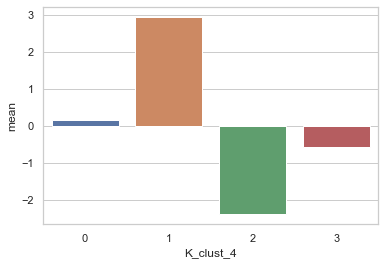

In [78]:
sns.barplot(x = cluster_summary_PC.reset_index().K_clust_4, y = cluster_summary_PC['PC1']['mean'])

<AxesSubplot:xlabel='K_clust_4', ylabel='mean'>

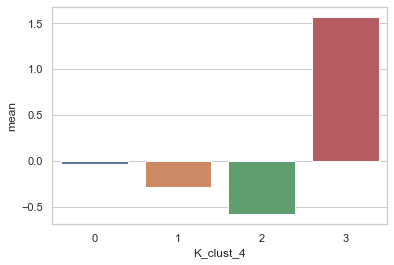

In [79]:
sns.barplot(x = cluster_summary_PC.reset_index().K_clust_4, y = cluster_summary_PC['PC2']['mean'])

### Cluster analysis for # of clusters = 3

In [80]:
# Kmeans with K=3
K_means_3 = KMeans(n_clusters = 3, max_iter=50)
K_means_3.fit(df_pca)

KMeans(max_iter=50, n_clusters=3)

In [81]:
K_cluster_labels_3 = pd.Series(K_means_3.labels_, index = df_pca.index) # Merging data with K-mean clusterID data
df_f = pd.concat([df_f, K_cluster_labels_3], axis = 1)
df_f = df_f.rename(columns={0: 'K_clust_3'})
df_f.K_clust_3.value_counts()

2    67
0    51
1    47
Name: K_clust_3, dtype: int64

In [82]:
ct = pd.crosstab(df_f['K_clust_4'], df_f['K_clust_3'])
print(ct)

K_clust_3   0   1   2
K_clust_4            
0           8   0  41
1          42   0   0
2           0  47   1
3           1   0  25


### Observation: Cluster #1 of 4-cluster K-means is the same as cluster #1 for 3-cluster K-means; This is the cluster with countries in dire need of financial aid

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

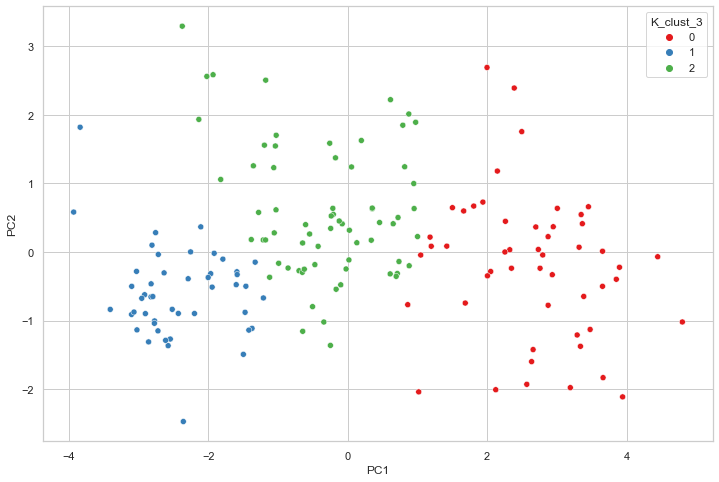

In [84]:
plt.figure(figsize = (12,8))
#cmap = sns.cubehelix_palette(dark=.9, light=.3, as_cmap=True)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'K_clust_3', data = df_f, palette= 'Set1')
#,  = 'flatui')

In [85]:
cluster_summary_3 = df_f.groupby('K_clust_3').agg({'child_mort': 'mean', 'exports': 'mean', 'health': 'mean',
                               'imports': 'mean', 'income': 'mean', 'inflation': 'mean', 
                             'life_expec': 'mean', 'total_fer': 'mean', 'gdpp': ['mean', 'count']}).round(0)
cluster_summary_3

child_mort exports health imports   income inflation life_expec  \
                mean    mean   mean    mean     mean      mean       mean   
K_clust_3                                                                   
0               85.0    28.0    6.0    45.0   2537.0       9.0       60.0   
1                6.0    53.0    9.0    52.0  32909.0       2.0       79.0   
2               23.0    44.0    6.0    45.0  17585.0      10.0       73.0   

          total_fer     gdpp        
               mean     mean count  
K_clust_3                           
0               5.0   1246.0    51  
1               2.0  32266.0    47  
2               2.0   8681.0    67

In [86]:
population_avg = df_f.drop(['K_clust_4', 'H_clust_4', 'K_clust_3'], axis = 1).mean()
cluster_avg_3 = df_f.drop(['H_clust_4', 'K_clust_4'], axis =1).groupby('K_clust_3').mean()
relative_imp_3 = cluster_avg_3/ population_avg - 1
relative_imp_3

,PC1,PC2,PC3,PC4,PC5,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
K_clust_3,,,,,,,,,,,,,,
0,4.479652e+16,7.189338e+15,4.838379e+16,5.913777e+14,-5.997311e+16,1.273221,-0.334715,-0.058568,-0.044054,-0.853358,0.262989,-0.147174,0.611030,-0.904894
1,-4.086790e+16,2.091072e+16,4.027796e+16,6.114821e+14,-8.749752e+16,-0.847999,0.273877,0.337772,0.107083,0.902389,-0.763521,0.118868,-0.427634,1.462827
2,-5.430318e+15,-2.014119e+16,-6.508414e+16,-8.791033e+14,1.070300e+17,-0.374303,0.062660,-0.192363,-0.041585,0.016552,0.335418,0.028643,-0.165131,-0.337362


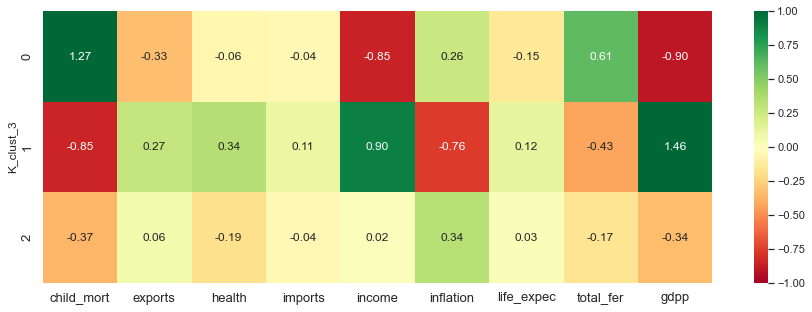

In [87]:
plt.figure(figsize = (15,5))
ax = sns.heatmap(relative_imp_3.drop(PCs, axis = 1), annot = True, fmt = '.2f', vmax = 1, vmin = -1, cmap = 'RdYlGn')
ax.tick_params(labelsize=13)

In [88]:
df_sp_3 = df_scaled.copy()
df_sp_3['K_clust_3'] = K_cluster_labels_3
df_melt_3 = pd.melt(df_sp_3.reset_index(), id_vars = ['country','K_clust_3'], var_name = 'Feature', value_name = 'Value')
df_melt_3.head()

,country,K_clust_3,Feature,Value
0,Afghanistan,0,child_mort,1.257285
1,Albania,2,child_mort,-0.206196
2,Algeria,2,child_mort,0.223939
3,Angola,0,child_mort,1.496866
4,Antigua and Barbuda,2,child_mort,-0.618844


<AxesSubplot:xlabel='Feature', ylabel='Value'>

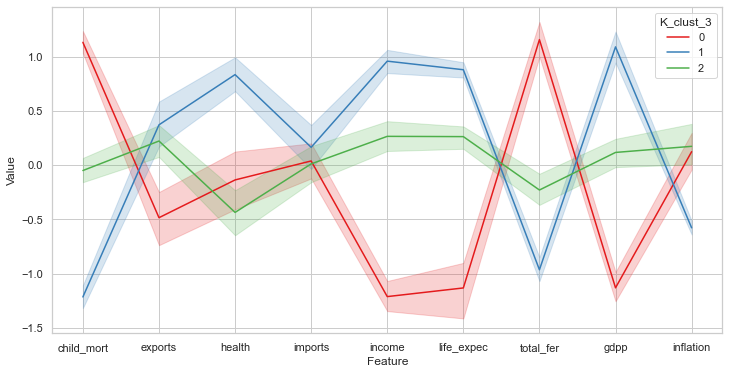

In [89]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt_3, hue = 'K_clust_3', palette = "Set1")

<AxesSubplot:xlabel='Feature', ylabel='Value'>

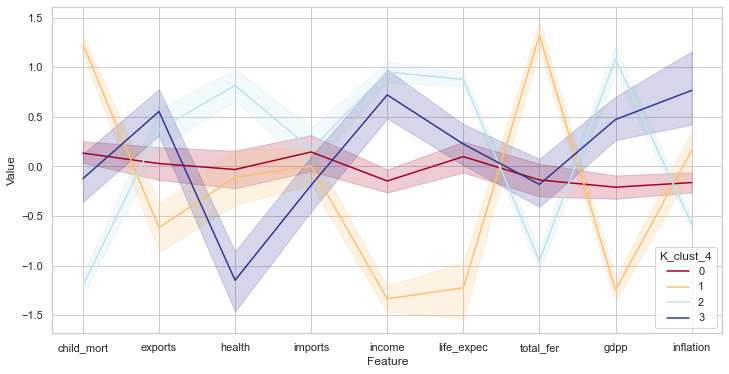

In [90]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Feature', y = 'Value', data = df_melt, hue = 'K_clust_4', palette = "RdYlBu")

In [91]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1485 non-null   object 
 1   K_clust_4  1485 non-null   int32  
 2   Feature    1485 non-null   object 
 3   Value      1485 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 40.7+ KB


In [92]:
clu0=df_melt.loc[df_melt['K_clust_4']==1]
clu0_child_mort=clu0.loc[clu0['Feature']=='child_mort']
clu0_income=clu0.loc[clu0['Feature']=='income']
clu0_gdpp=clu0.loc[clu0['Feature']=='gdpp']

In [93]:
# Contries with highest child mortality rate which needs aid
clu0_child_mort.nlargest(15,'Value')

,country,K_clust_4,Feature,Value
66,Haiti,1,child_mort,1.979683
130,Sierra Leone,1,child_mort,1.752837
32,Chad,1,child_mort,1.697036
31,Central African Republic,1,child_mort,1.691253
97,Mali,1,child_mort,1.618654
111,Niger,1,child_mort,1.525451
3,Angola,1,child_mort,1.496866
25,Burkina Faso,1,child_mort,1.474789
37,"Congo, Dem. Rep.",1,child_mort,1.474789
64,Guinea-Bissau,1,child_mort,1.459752


In [94]:
# Countries with less income which requires aid
clu0_income.nsmallest(15,'Value')

,country,K_clust_4,Feature,Value
697,"Congo, Dem. Rep.",1,income,-2.206478
748,Liberia,1,income,-2.092822
686,Burundi,1,income,-2.021421
771,Niger,1,income,-1.969684
691,Central African Republic,1,income,-1.898672
766,Mozambique,1,income,-1.871555
754,Malawi,1,income,-1.777605
723,Guinea,1,income,-1.659760
808,Togo,1,income,-1.646157
790,Sierra Leone,1,income,-1.639440


In [95]:
# Countries with less Gdpp which requires aid
clu0_gdpp.nsmallest(15,'Value')

,country,K_clust_4,Feature,Value
1181,Burundi,1,gdpp,-2.044268
1243,Liberia,1,gdpp,-1.811877
1192,"Congo, Dem. Rep.",1,gdpp,-1.797714
1266,Niger,1,gdpp,-1.770258
1285,Sierra Leone,1,gdpp,-1.678811
1248,Madagascar,1,gdpp,-1.655752
1261,Mozambique,1,gdpp,-1.646107
1186,Central African Republic,1,gdpp,-1.604350
1249,Malawi,1,gdpp,-1.585138
1205,Eritrea,1,gdpp,-1.552444


### We can clearly see that countries are common in each of these dataframe with respect to (child_mort, income and gdpp).

### Some of those countries are:

1. Congo, Dem. Rep.
2. Sierra Leone
3. Niger
4. Mozambique
5. Guinea-Bissau
6. Central African Republic
7. Liberia